# *Lecture 27*

# Quantum Wavefunctions in 1-D and 2-D

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Reminder of Time-Dependent Schrödinger Equation

In the time-dependent Schrödinger Equation (TDSE),
$$\begin{align}
i\hbar \ \frac{\partial\psi(x,t)}{\partial t} & =
\hat{H}\psi(x,t)\\
i\hbar \ \frac{\partial\psi(x,t)}{\partial t} & =   - \frac{\hbar^2} {2m}
\frac{\partial^2 \psi(x,t)}{\partial x^2}
+V(x)\psi(x,t)\end{align}$$

we set $\hbar^2/2m=1$ for simplicity.

$$
\begin{align}
\frac{\partial R(x,t)}{\partial t} &= -\frac{\partial^2 I(x,t)}{\partial x^2} + VI(x,t) \\
\frac{\partial I(x,t)}{\partial t} &= +\frac{\partial^2 R(x,t)}{\partial x^2} - VR(x,t)
\end{align}$$

The discretization of $R$ and $I$ can happen, in principle, on the same space-time grid with spacings $\Delta x$ and $\Delta t$.

In the position notation of the grid, we then have the explicit equations for updating $R$ and $I$ at time step $n+1$:

$$
R^{n+1}_i = R^{n}_i -2\alpha\left(I^n_{i+1} + I^n_{i-1} -2 I^n_i \right) + V_i \Delta t I^n_i$$

$$
I^{n+1}_i  = I^{n}_i + 2 \alpha\left(R^n_{i+1} +R^n_{i-1} - 2 R^n_i \right)- V_i \Delta t R^n_i$$

We can see that both $R$ and $I$ are updated after a full time step, but the evaluations of $R$ and $I$ are performed at different times.
They are shifted by $\Delta t/2$.

The next example shows the behavior at the $x^4$ potential, which starts to approximate the square well.

<IPython.core.display.Javascript object>


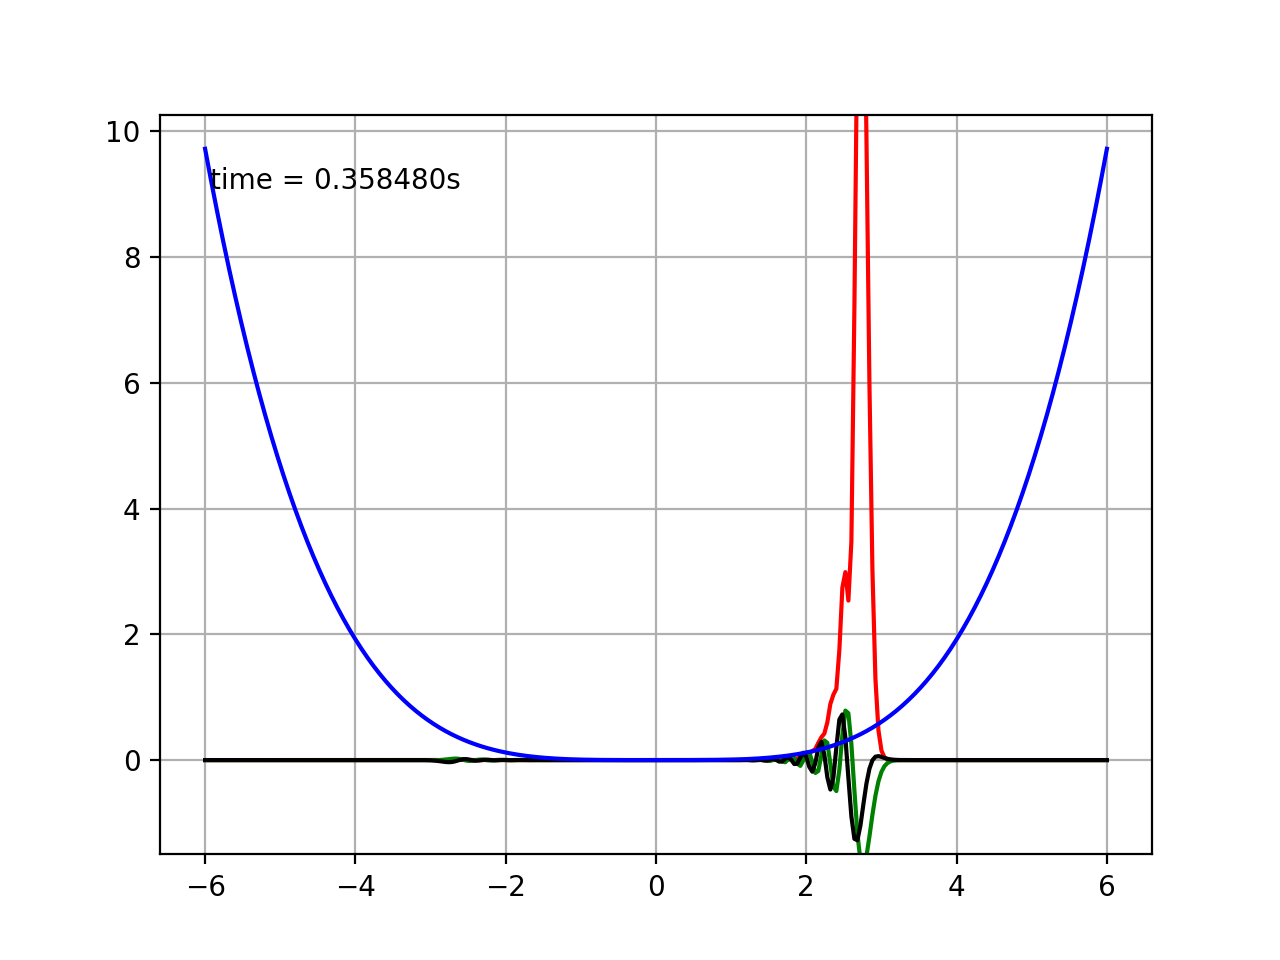

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    

dx = 0.04
dx2 = dx*dx
k0 = 10.5*np.pi
dt = dx2/20.0

xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2,dx)                     

psr = np.exp(-0.5*(xs/0.5)**2) * np.cos(k0*xs)                # Initial RePsi
psi = np.exp(-0.5*(xs/0.5)**2) * np.sin(k0*xs)                # Initial ImPsi
v   = 15.0*pow(xs,4)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
ax.grid()

P_curve, = ax.plot(xs, 4*(psr**2 + psi**2), 'r-')
R_curve, = ax.plot(xs, psr, 'g-')
I_curve, = ax.plot(xs, psi, 'k-')
V_curve = ax.plot(xs, v/2000, 'b-')
time_template = 'time = %fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text('')
    return P_curve, R_curve, I_curve, time_text

def animate(i):
    psr[1:-1] = psr[1:-1] - \
      (dt/dx2)*(psi[2:] + psi[:-2] - 2*psi[1:-1]) + dt*v[1:-1]*psi[1:-1]
    psi[1:-1] = psi[1:-1] + \
      (dt/dx2)*(psr[2:] + psr[:-2] - 2*psr[1:-1]) - dt*v[1:-1]*psr[1:-1]
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text(time_template % (i*dt))
    return P_curve, R_curve, I_curve, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10000),
                              interval=1, blit=True, init_func=init)

In this example, we should be careful with the $\Delta t$, or, more precisely, $\Delta t / (\Delta x)^2$.
* Exercise: change $\Delta t$ to ensure a stable solution.

In the next example, we create a true square well and see how the particle behaves when it encounters the wall.

Try the following cases:
* low $V$ wall
* high $V$ wall
* "infinite" $V$ wall

<IPython.core.display.Javascript object>


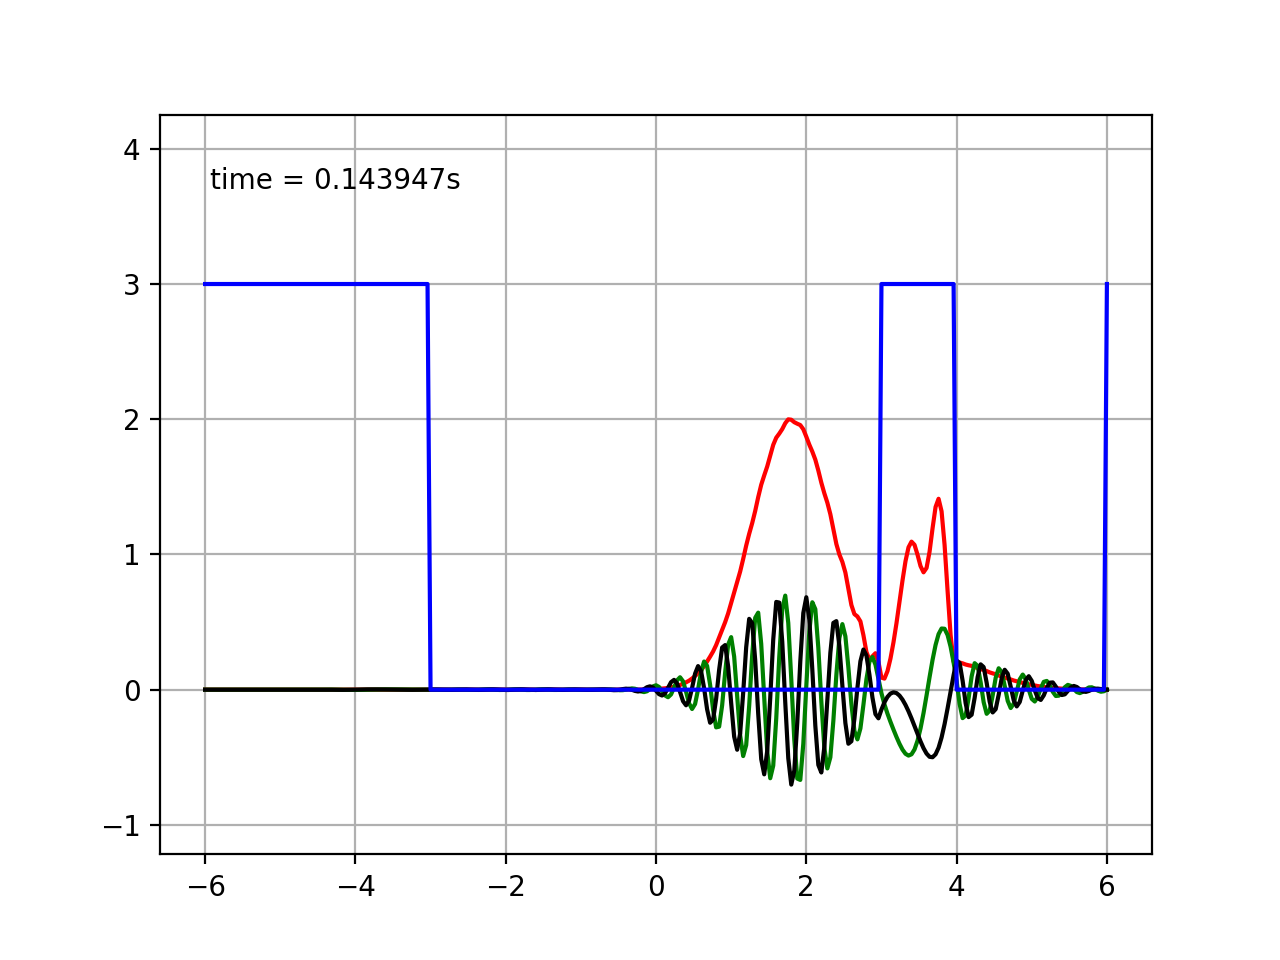

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    

dx = 0.04
dx2 = dx*dx
k0 = 5.5*np.pi
dt = dx2/30.

xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2,dx)                     

psr = np.exp(-0.5*(xs/0.5)**2) * np.cos(k0*xs)                # Initial RePsi
psi = np.exp(-0.5*(xs/0.5)**2) * np.sin(k0*xs)                # Initial ImPsi
v   = xs.copy()

for i in range(len(xs)):
    if (abs(xs[i]) < 3.0):
        v[i] = 0.
    elif (abs(xs[i] > 4.0 and abs(xs[i] < 6.0))):
        v[i] = 0.
    else:
        v[i] = 3e2
    
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
ax.grid()

P_curve, = ax.plot(xs, 4*(psr**2 + psi**2), 'r-')
R_curve, = ax.plot(xs, psr, 'g-')
I_curve, = ax.plot(xs, psi, 'k-')
V_curve = ax.plot(xs, v/1e2, 'b-')
time_template = 'time = %fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text('')
    return P_curve, R_curve, I_curve, time_text

def animate(i):
    psr[1:-1] = psr[1:-1] - \
      (dt/dx2)*(psi[2:] + psi[:-2] - 2*psi[1:-1]) + dt*v[1:-1]*psi[1:-1]
    psi[1:-1] = psi[1:-1] + \
      (dt/dx2)*(psr[2:] + psr[:-2] - 2*psr[1:-1]) - dt*v[1:-1]*psr[1:-1]
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text(time_template % (i*dt))
    return P_curve, R_curve, I_curve, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10000),
                              interval=2, blit=True, init_func=init)

*Exercise*: change the potential barrier to something crazy, beyond the simple finite step, and see if the solver still works.
This is the power of computational physics.

# 2-D Schrödinger equation

We are somewhat limited in 3-D animations for a 2-D wave function, but it is useful to have the explicit equations for $R$ and $I$ in 2 dimensions.

A brute force derivation using the finite difference approximations in $x$, $y$, and $t$ gives the following (corrected) discrete versions of the 2-D Schrödinger equation.

In this case, $i,j$ are the indices on the discrete position grid in $(x,y)$, and $n$ is again the index of the time variable.

$$\begin{align}
R^{n+1}_{i,j} &=  R^{n}_{i,j}-2 \left[\alpha
    \left(I^n_{i+1,j}+I^n_{i-1,j}
+I^n_{i,j+1}+I^n_{i,j-1}\right) - \left(4\alpha +\frac{1}{2}\Delta t
    V_{i,j}\right)I^n_{i,j}  \right] \\
 &= R^{n}_i -\frac{\Delta t}{(\Delta x)^2} \left(I^n_{i+1,j}+I^n_{i-1,j}
+I^n_{i,j+1}+I^n_{i,j-1} - 4 I^n_{i,j} \right) + V_{ij} \Delta t I^n_{i,j} \\
    I^{n+1}_{i,j}
    & =  I^{n-1}_{i,j}+2\left[\alpha
    \left(R^n_{i+1,j}+R^n_{i-1,j}+R^n_{i,j+1}
+R^n_{i,j-1}\right) - \left(4\alpha+\frac{1}{2}\Delta t
    V_{i,j}\right)R^n_{i,j}\right] \\
&= I^{n}_i +\frac{\Delta t}{(\Delta x)^2} \left(R^n_{i+1,j}+R^n_{i-1,j}
+R^n_{i,j+1}+R^n_{i,j-1} - 4 R^n_{i,j} \right) - V_{ij} \Delta t R^n_{i,j} \\
 \end{align}$$

Compare to the 1-D results

$$\begin{align}
R^{n+1}_i& = R^{n}_i - 2\left[ \alpha\left(I^n_{i+1}
+I^n_{i-1}\right) - \left(2\alpha + \frac{1}{2} V_i \Delta t\right)I^n_i
\right] \\
I^{n+1}_i& = I^{n}_i + 2 \left[\alpha\left(R^n_{i+1}
+R^n_{i-1}\right)-\left(2 \alpha+ \frac{1}{2} V_i \Delta
t\right)R^n_i\right]\end{align}$$

The main difference is that we subtract 4 times the central value in the grid instead of 2, because we are taking two finite differences (in $x$ and $y$) instead of one.

In the simulation, the harmonic oscillator potential breaks the symmetry between the wave behavior in $x$ and $y$.  (Turn the animation around for a better view.)

<IPython.core.display.Javascript object>


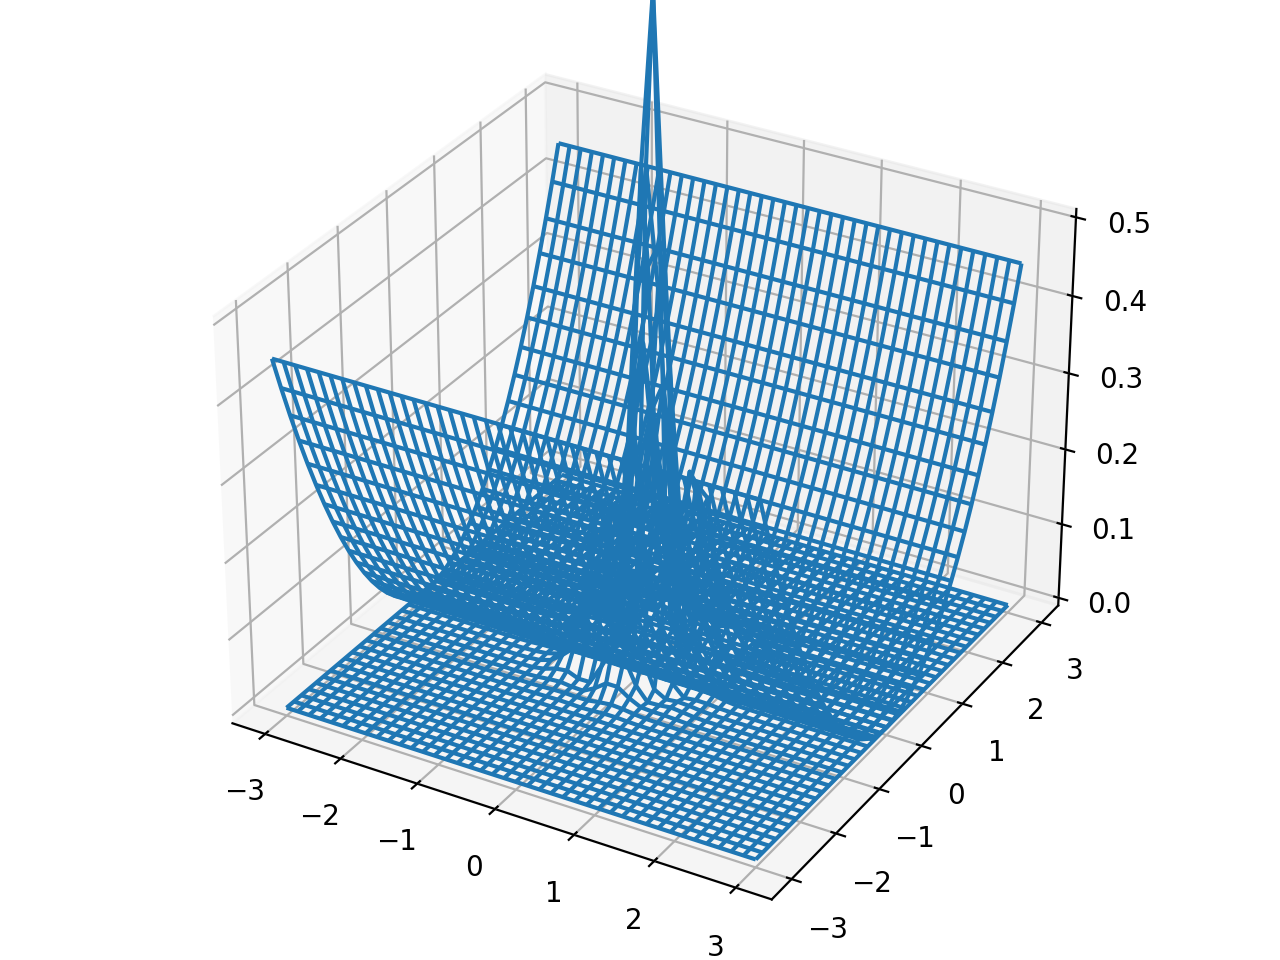

In [16]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    
from mpl_toolkits.mplot3d import Axes3D

dx = 0.15
dy = dx
dx2 = dx*dx
dy2 = dy*dy
k0 = 5.5*np.pi
dt = dx2/40.

xmax = 3.0
ymax = xmax
xs = np.arange(-xmax,xmax+dx/2,dx)
ys = np.arange(-ymax,ymax+dy/2,dy)                     
xm, ym = np.meshgrid(xs, ys)

psr = np.exp(-0.5*(xm/0.5)**2) * np.exp(-0.5*(ym/0.5)**2) * np.cos(k0*xm) * np.cos(k0*ym)
psi = np.exp(-0.5*(xm/0.5)**2) * np.exp(-0.5*(ym/0.5)**2) * np.sin(k0*xm) * np.sin(k0*ym)
v   = 100.*pow(ym,2)
#v = np.zeros((len(xs),len(ys)))
    
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)              
ax.grid()
ax.set_zlim(0., 0.5)

def init():
    animate.vwframe = ax.plot_wireframe(xm, ym, v/2000)
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.vwframe, animate.pwframe

def animate(i):
# This fancy indexing does not work: no motion in y
    ax.collections.remove(animate.pwframe)
    psr[1:-2][1:-2] = psr[1:-2][1:-2] - \
      (dt/dx2)*(psi[2:-1][1:-2] + psi[0:-3][1:-2] + psi[1:-2][2:-1] + psi[1:-2][0:-3] - 4*psi[1:-2][1:-2]) + \
        dt*v[1:-2][1:-2]*psi[1:-2][1:-2]        
    psi[1:-2][1:-2] = psi[1:-2][1:-2] + \
      (dt/dx2)*(psr[2:-1][1:-2] + psr[0:-3][1:-2] + psr[1:-2][2:-1] + psr[1:-2][0:-3] - 4*psr[1:-2][1:-2]) - \
        dt*v[1:-2][1:-2]*psr[1:-2][1:-2]
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.pwframe

def animate2(i):
    ax.collections.remove(animate.pwframe)
    for i in range(1,len(xs)-2):
        for j in range(1, len(ys)-2):
            psr[i][j] = psr[i][j] - \
            (dt/dx2)*(psi[i+1][j] + psi[i-1][j] + psi[i][j+1] + psi[i][j-1] - 4*psi[i][j]) + \
            dt*v[i][j]*psi[i][j]
            
            psi[i][j] = psi[i][j] + \
            (dt/dx2)*(psr[i+1][j] + psr[i-1][j] + psr[i][j+1] + psr[i][j-1] - 4*psr[i][j]) - \
            dt*v[i][j]*psr[i][j]
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.pwframe

ani = animation.FuncAnimation(fig, animate2, np.arange(1, 10000),
                              interval=2, blit=True, init_func=init)